# Introduction

The notebook contains 4 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)


**Clustering** is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

There are many types of clustering models: 

- **Connectivity models**: As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.

- **Centroid models**: These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. **K-Means clustering algorithm** is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

- **Distribution models**: These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.


- **Density Models**: These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.

In the following we will study one of the most popular models for clustering: **K means**.


- **K-Means clustering** is the most popular unsupervised learning algorithm that is used for clustering. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

  K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include: 

  - Image segmentation
  - Customer segmentation
  - Species clustering
  - Anomaly detection
  - Clustering languages

  K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering. What's a centroid ? 

  **Centroid** is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. 

  K-Means clustering works as follows:

  - The K-Means clustering algorithm uses an iterative procedure to deliver a final result. 
  - The algorithm requires number of clusters K and the data set as input. 
  - The data set is a collection of features for each data point. 
  - The algorithm starts with initial estimates for the K centroids. 



# Application

## Goal

The goal of this notebook is to show how k-means works to cluster handwritten digits. 

## Dataset Description

The used dataset is the digits dataset (datasets.load_digits()). This dataset The digits dataset consists of 8x8 pixel images of digits. The "images" attribute of the dataset stores 8x8 arrays of grayscale values for each image. The "target" attribute of the dataset stores the digit each image represents.

# 1. Import libraries

In the following we will be using: 


- **Sklearn**: Scikit-learn is one of the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

- **Numpy**: NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.  

- **Pandas**: Pandas makes it simple to do many of the time consuming, repetitive tasks associated with working with data, including:
 - Data cleansing
 - Data fill
 - Data normalization
 - Merges and joins
 - Data visualization
 - Statistical analysis
 - Data inspection
 - Loading and saving data

- **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.


- **Seaborn**: Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# 2. Load the dataset

In [ ]:
#load is used to load datasets of the sklearn.datasets 
digits = load_digits()

In [ ]:
#"scale" function is an inbuilt function in the Python sklearn.preprocessing library which is used to change the image size by scaling each pixel value by given columns and rows.
data = scale(digits.data)

# 3. Feature engineering

The goal of this step is simplifying and speeding up data transformations while also enhancing model accuracy. 

There are many approaches that can be taken into consideration: 

- **Feature Creation**: Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features. 

- **Transformations**: Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.

- **Feature Extraction**: Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.

- **Exploratory Data Analysis**: Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t been analyzed before.

- **Benchmark**: A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own.

In the following we will start by discovering how the dataset look like. 


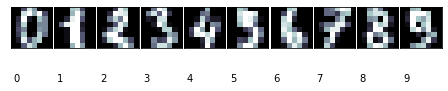

In [ ]:
"""
This function is defined to visualize some of the 10 clusters of the dataset
"""

import matplotlib.pyplot as plt

def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

plt.gray()
plt.matshow()
plt.show()

<a name="ex_1"></a>
## Exercise 1

In [ ]:
# Without defining a new function as in the code block above, plot the different digits (10 clusters) of the dataset only using gray(), matshow(), show() functions of the matplotlib.pyplot 
#edited above

We already scaled the dataset when we first upload it to our workplace, now we shape using the "reshape function".

n_digits: 10, 	 n_samples 898, 	 n_features 64


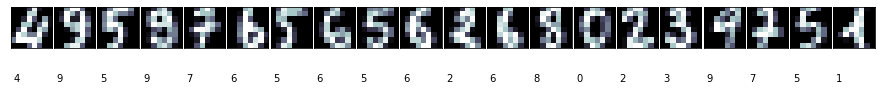

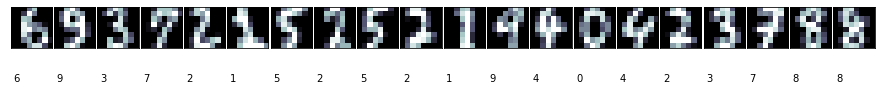

In [ ]:
#returns the shape of teh first image in the dataset 
number_of_instances=digits.images.shape[0]
#Splitting the training and testing dataset (defining the target variable)
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images.reshape(number_of_instances,64),test_size=0.5, random_state=42)
#Returns the number of samples and features in the training set 
n_samples, n_features = X_train.shape
#returns the length of the labels (y_train) of only unique values
n_digits = len(np.unique(y_train))
labels = y_train

# Reshape images back
images_train=images_train.reshape(images_train.shape[0],8,8)
images_test=images_test.reshape(images_test.shape[0],8,8)

#visualization of the different digits 
print_digits(images_train, y_train, max_n=20)
print_digits(images_test, y_test, max_n=20)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

<a name="ex_2"></a>
## Exercise 2

In [ ]:
#After running this notebook,
#Change the "test_size" and see what is the impact of the results of the model

# 4. Training the Kmeans model

(898,)
[3 6 3 1 2 6 2 3 4]


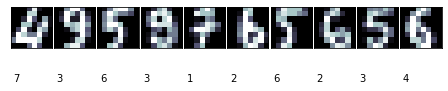

In [ ]:
#Kmeans is a cluster class provided by the sklearn package: 
"""
KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
Note : The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.
"""
clustering_features = KMeans(init='k-means++', n_clusters=10, random_state=42)
#the "fit()" function implements a fit method to learn from data
clustering_features.fit(X_train)
#Printing Number of labels(from 1 to 10)
print (clustering_features.labels_.shape)
print (clustering_features.labels_[1:10])
print_digits(images_train, clustering_features.labels_, max_n=10)

After training, we want to visualize the results of the clustering. We are printing 10 groups of predicted cluster and ground truth cluster. 


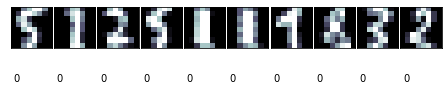

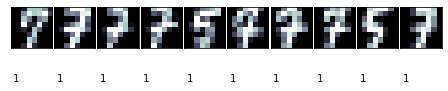

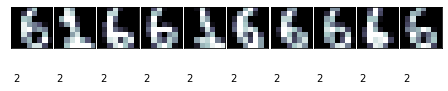

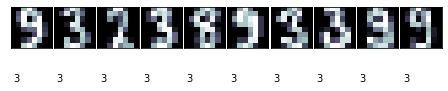

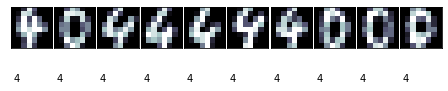

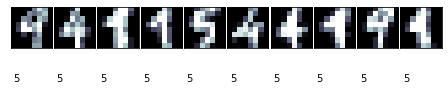

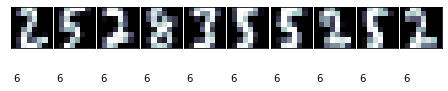

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [ ]:
#The predict() function returns the labels of the data passed as argument (X_test) based upon the learned or trained data (clustering_features) obtained from the model.
y_pred = clustering_features.predict(X_test)
#Show clustered 
def print_clustered(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

for i in range(10):
     print_clustered(images_test, y_pred, i)

# 5. Model evaluation




There are many metrics that can be used to evaluate the performance of a clustering model: 

* adjusted (or unadjusted) Rand index: is a function that measures the similarity of the two assignments, ignoring permutations

* Homogeneity, completeness and V-measure: 

- homogeneity: each cluster contains only members of a single class.

- completeness: all members of a given class are assigned to the same cluster.

* Fowlkes-Mallows scores: can be used when the ground truth class assignments of the samples is known. 


In the following we will use 4 metrics: adjusted rand score, homogeneity, completeness and v-measure. 


In [ ]:
#The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters 
print("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
#The Homogeneity score is used to see if a result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
print("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)))
#the Completeness score is used to verify if all the data points that are members of a given class are elements of the same cluster
print("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))
#The V-measure is the harmonic mean between homogeneity and completeness
print("the V measure of the Kmeans model is : {:.2} ".format(metrics.v_measure_score(y_test, y_pred)))

Addjusted rand score:0.38
Homogeneity score:0.49 
Completeness score: 0.6 
the V measure of the Kmeans model is : 0.54 


<a name="ex_3"></a>
##Exercise 3

In [ ]:
#Knowing that there are different other metrics for clustering: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics 

#Add more clustering metrics and print their results


print(format(metrics.mutual_info_score(y_test, y_pred)))

print(format(metrics.rand_score(y_test, y_pred)))

1.128167220786211
0.8573569742178268


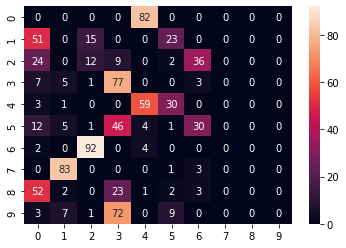

In [ ]:
#Creating confusion matrix: 
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

# 6. PCA 


## Back to feature engineering

In the following we will try to train same model:Kmeans but on a reduced dataset using the PCA (Principle Component Analysis).

PCA allows to project the data from the original 64-dimensional space into a lower dimensional space. Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space.


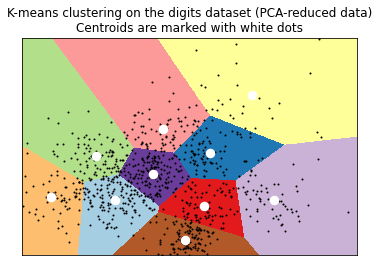

In [ ]:
#Project into a 2-dimensional space
pca = PCA(n_components=2).fit(X_train)

reduced_X_train = pca.transform(X_train)

h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max]

# Plot the decision boundary, For that, we will asign a color to each

x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1

y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


#Always th enmber of clusters is same as number of digits 

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
#Now the Kmeans is trained on the reduced dataset : "reduced_X_train": 

kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
         'Centroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

<a name="ex_4"></a>
## Exercise 4

In [ ]:
# Using link to documentation : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

#Tell if it's possible to use more components (parameter: n_components=3)
#If YES: 
#Rewrite the code block and readjust it to the new kept dimention (3)

#If NOT: 
#Explain why
#X has 2 features, but KMeans is expecting 3 features as input.  The dimensions don't match

# References

[1] https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py 

[2] https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py

[3] https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py 

[4] https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py 

[5] https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py 

[6] https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

[7] https://numpy.org/doc/stable/user/index.html#user 

[8] https://scikit-learn.org/stable/user_guide.html 


[9] https://seaborn.pydata.org/tutorial.html 

[10] https://matplotlib.org/stable/index.html 


[11] https://realpython.com/k-means-clustering-python/ 


[12] https://github.com/milaan9/Clustering_Algorithms_from_Scratch/tree/main/02_Python


[13] https://github.com/rezacsedu/Deep-Learning-for-Clustering-in-Bioinformatics/tree/master/Notebooks 


[14] https://github.com/at-tan/Hierarchical_Clustering_of_Currencies/blob/main/fx_clustering.ipynb 


[15] https://github.com/zhoushengisnoob/DeepClustering

[16] https://scikit-learn.org/stable/modules/clustering.html 


[17] https://github.com/ahegel/genre-ML-clustering


[18] https://github.com/durgeshsamariya/awesome-clustering-resources